### Find Word Images Mask Fade

In [1]:
import cv2
import PIL
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import re
import glob
from pathlib import Path
import shutil
from os.path import isfile, join

In [2]:
# language pair
lang_folder = "Turkish"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> target language for learner
#lang_pair = "English"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> native language

file_ext = 1000

In [3]:
word_lemma_all_data_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-2-Word In Visual Genome Merge"

path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-3-Find Word Images Mask Fade"

Path(path).mkdir(parents=True, exist_ok=True)

In [4]:
def word_group_dataframe(df, search_list, target_column, sample_num):
    '''
    word_group_dataframe(df_youtube_sentence, search_list, "sentence", 6)\n
    df_youtube_sentence is dataframe and "sentence" is its column for external searching_list
    ''' 
    df_search_result = pd.DataFrame()
    for j in search_list:
        df_select = df[df[f"{target_column}"].str.contains(fr"(?:\s|^){j}(?:\s|$)", na=False, regex=True)]
        #df_select.sort_values(f"{target_column}",key=lambda x:x.str.len(), inplace=True).head(sample_num)
        df_select = df_select.sort_values(f"{target_column}",key=lambda x:x.str.len()).head(sample_num)               
        df_select.insert(0,"search_string",j)
        df_search_result = pd.concat([df_search_result,df_select], axis=0)
    df_search_result.reset_index(inplace=True, drop=True)
    
    return df_search_result

In [5]:
def word_group_dataframe_all(df, search_list, target_column):
    '''
    word_group_dataframe(df_youtube_sentence, search_list, "sentence", 6)\n
    df_youtube_sentence is dataframe and "sentence" is its column for external searching_list
    ''' 
    df_search_result = pd.DataFrame()
    for j in search_list:
        df_select = df[df[f"{target_column}"].str.contains(fr"(?:\s|^){j}(?:\s|$)", na=False, regex=True)]
        #df_select.sort_values(f"{target_column}",key=lambda x:x.str.len(), inplace=True)
        df_select = df_select.sort_values(f"{target_column}",key=lambda x:x.str.len())
        df_select.insert(0,"search_string",j)
        df_search_result = pd.concat([df_search_result,df_select], axis=0)        
    df_search_result.reset_index(inplace=True, drop=True)
    
    return df_search_result

In [6]:
def take_dataframe_word_sample_from_sorting(df_source, word_list, word_source_column, sort_target_column, sort_ascending=True, sample_num=50):
    '''take_dataframe_word_sample_from_sorting(df_source, word_list, word_source_column, sort_target_column, sort_ascending=True, sample_num=50)\n
    df_source is a dataframe and word_list is equal in word_source_column. Then sort_target_column is sorting according to sort_ascending condition.\n
    Finally, taking sample_num each word_list values.\n 
    ex.\n
    take_dataframe_word_sample_from_sorting(df_genome_word_lemma_concat, word_list, "word", "search_text", sort_ascending=True, sample_num=50)
    '''
    df_search_result = pd.DataFrame()
    for word in word_list:
        df_select = df_source[df_source[f"{word_source_column}"] == word]
        df_select = df_select.sort_values(f"{sort_target_column}",key=lambda x:x.str.len(), ascending=sort_ascending).head(sample_num)
        df_search_result = pd.concat([df_search_result,df_select], axis=0)
    
    df_search_result.reset_index(inplace=True, drop=True)
    
    return df_search_result

In [7]:
def create_word_folder_and_copy_image(df_source, word_list, word_source_column, image_id_column, image_folder_path, output_path_folder):
    '''create_word_folder_and_copy_image(df_source, word_list, word_source_column, image_id_column, image_folder_path, output_path_folder)\n
    df_source is a dataframe and word_list is equal in word_source_column. Then word image id search in image_id_column and image copy to\n
    output_path_folder from image_folder_path.\n
    ex.\n
    image_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Lemma Stem POS/Data/Visual Genome/images"\n
    output_path_folder = "/home/kurubal/Downloads/temp folder"\n
    create_word_folder_and_copy_image(df_sample_result, word_list, "word", "image_id", image_path, output_path_folder)
    '''
    df_search_result = pd.DataFrame()
    for word in word_list:
        path = f"{output_path_folder}/{word}"
        Path(path).mkdir(parents=True, exist_ok=True)        
        df_select = df_source[df_source[f"{word_source_column}"] == word]
        for image_id in df_select[f"{image_id_column}"]:
            image_file = glob.glob(f"{image_folder_path}/*/{image_id}.jpg")
            for l in image_file:
                source = l # source directory
                destination = path
                shutil.copy2(source, destination)

In [8]:
image_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Lemma Stem POS/Data/Visual Genome/images"

In [9]:
image_folder_list = glob.glob(f"{image_path}/*")
image_folder_list

['/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K_2',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_Mask_Blur']

#### Visual Genome Word Lemma All Category Data

In [10]:
df_genome_word_lemma_all_category_concat = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-2-Word In Visual Genome Merge/Visual_Genome_{file_ext}_Word_Lemma_All_Category_Concat_Result.xlsx")
df_genome_word_lemma_all_category_concat

POS1 POS2     word lemma.spacy stem word_en_translate  \
0        NUM  NaN      bir         bir  bir                 a   
1        NUM  NaN      bir         bir  bir                 a   
2        NUM  NaN      bir         bir  bir                 a   
3        NUM  NaN      bir         bir  bir                 a   
4        NUM  NaN      bir         bir  bir                 a   
...      ...  ...      ...         ...  ...               ...   
197127  VERB  NaN  çekilin         çek  çek          withdraw   
197128  VERB  NaN  çekilin         çek  çek          withdraw   
197129  VERB  NaN  çekilin         çek  çek          withdraw   
197130  VERB  NaN  çekilin         çek  çek          withdraw   
197131  VERB  NaN  çekilin         çek  çek          withdraw   

       lemma_en_translate  frequency  object_id names  ...  y_koor  \
0                       a   18835735  4446407.0     a  ...   305.0   
1                       a   18835735  3904298.0     a  ...   113.0   
2                       a   18835735  3904300.0     a  ...   233.0   
3                       a   18835735  3902259.0     a  ...   168.0   
4                       a   18835735  3902256.0     a  ...    97.0   
...                   ...        ...        ...   ...  ...     ...   
197127              check      69201        NaN   NaN  ...    37.0   
197128              check      69201        NaN   NaN  ...   459.0   
197129              check      69201        NaN   NaN  ...   236.0   
197130              check      69201        NaN   NaN  ...   194.0   
197131              check      69201        NaN   NaN  ...   286.0   

                 num  attributes  sub_name  sub_object_id questions  \
0         2920126305         NaN       NaN            NaN       NaN   
1       129190150113         NaN       NaN            NaN       NaN   
2       123317182233         NaN       NaN            NaN       NaN   
3         4615142168         NaN       NaN            NaN       NaN   
4           54188097         NaN       NaN            NaN       NaN   
...              ...         ...       ...            ...       ...   
197127     276026737         NaN       NaN            NaN       NaN   
197128     376517459         NaN       NaN            NaN       NaN   
197129   95132301236         NaN       NaN            NaN       NaN   
197130    2211405194         NaN       NaN            NaN       NaN   
197131    6140115286         NaN       NaN            NaN       NaN   

       que_and_ans_id answers                  phrases  region_id  
0                 NaN     NaN                      NaN        NaN  
1                 NaN     NaN                      NaN        NaN  
2                 NaN     NaN                      NaN        NaN  
3                 NaN     NaN                      NaN        NaN  
4                 NaN     NaN                      NaN        NaN  
...               ...     ...                      ...        ...  
197127            NaN     NaN  airport check in kiosks  4492506.0  
197128            NaN     NaN  red check of tablecloth   726657.0  
197129            NaN     NaN  a check is on the table  1814370.0  
197130            NaN     NaN  cleats with white check  2132765.0  
197131            NaN     NaN  check number on receipt   556226.0  

[197132 rows x 24 columns]

In [11]:
#df_genome_word_lemma_all_category_concat_num = df_genome_word_lemma_all_category_concat.reset_index(names="num")
#df_genome_word_lemma_all_category_concat_num

In [12]:
df_genome_word_lemma_all_category_concat_num_dropna = df_genome_word_lemma_all_category_concat.dropna(subset=["height","width","x_koor","y_koor"])
df_genome_word_lemma_all_category_concat_num_dropna = df_genome_word_lemma_all_category_concat[["num","word","lemma.spacy","stem","word_en_translate","image_id","height","width","x_koor","y_koor"]]
df_genome_word_lemma_all_category_concat_num_dropna

num     word lemma.spacy stem word_en_translate  image_id  \
0         2920126305      bir         bir  bir                 a   2390994   
1       129190150113      bir         bir  bir                 a   2348965   
2       123317182233      bir         bir  bir                 a   2348965   
3         4615142168      bir         bir  bir                 a   2349861   
4           54188097      bir         bir  bir                 a   2349866   
...              ...      ...         ...  ...               ...       ...   
197127     276026737  çekilin         çek  çek          withdraw   2317616   
197128     376517459  çekilin         çek  çek          withdraw   2400604   
197129   95132301236  çekilin         çek  çek          withdraw   2386272   
197130    2211405194  çekilin         çek  çek          withdraw   2371210   
197131    6140115286  çekilin         çek  çek          withdraw   2404231   

        height  width  x_koor  y_koor  
0         29.0   20.0   126.0   305.0  
1        129.0  190.0   150.0   113.0  
2        123.0  317.0   182.0   233.0  
3         46.0   15.0   142.0   168.0  
4         54.0  188.0     0.0    97.0  
...        ...    ...     ...     ...  
197127    27.0   60.0   267.0    37.0  
197128    37.0   65.0    17.0   459.0  
197129    95.0  132.0   301.0   236.0  
197130    22.0   11.0   405.0   194.0  
197131    61.0   40.0   115.0   286.0  

[197132 rows x 10 columns]

In [13]:
df_genome_word_lemma_all_category_concat_num_dropna.sort_values(by=["height","width"], ascending=False)

num     word lemma.spacy    stem word_en_translate  image_id  \
34868    9986353017   içinde          iç      iç            inside    498200   
35167    9986353017    içeri       içeri      iç            inside    498200   
107780  93712681012  yaşıyor        yaşa     yaş            living    713302   
22700     900175092   yardım      yardım  yardım              help    285821   
107056  89566458101    parti       parti   parti             party   1592034   
...             ...      ...         ...     ...               ...       ...   
197077            0  çekilin         çek     çek          withdraw   2402521   
197078            0  çekilin         çek     çek          withdraw   2326823   
197079            0  çekilin         çek     çek          withdraw   2398854   
197080            0  çekilin         çek     çek          withdraw   2363300   
197081            0  çekilin         çek     çek          withdraw   2393249   

        height   width  x_koor  y_koor  
34868    998.0   635.0    30.0    17.0  
35167    998.0   635.0    30.0    17.0  
107780   937.0  1268.0    10.0    12.0  
22700    900.0   175.0     0.0    92.0  
107056   895.0   664.0    58.0   101.0  
...        ...     ...     ...     ...  
197077     NaN     NaN     NaN     NaN  
197078     NaN     NaN     NaN     NaN  
197079     NaN     NaN     NaN     NaN  
197080     NaN     NaN     NaN     NaN  
197081     NaN     NaN     NaN     NaN  

[197132 rows x 10 columns]

In [14]:
df_genome_word_lemma_all_category_concat_num_dropna[(df_genome_word_lemma_all_category_concat_num_dropna["height"] >= 50) & (df_genome_word_lemma_all_category_concat_num_dropna["width"] >= 50)]

num     word lemma.spacy stem word_en_translate  image_id  \
1       129190150113      bir         bir  bir                 a   2348965   
2       123317182233      bir         bir  bir                 a   2348965   
4           54188097      bir         bir  bir                 a   2349866   
7        16728217895      bir         bir  bir                 a   2350230   
10        1481294351      bir         bir  bir                 a   2350444   
...              ...      ...         ...  ...               ...       ...   
197119     107205682  çekilin         çek  çek          withdraw   2365274   
197121     537334384  çekilin         çek  çek          withdraw   2387284   
197122     104139757  çekilin         çek  çek          withdraw   2400843   
197126    4612198435  çekilin         çek  çek          withdraw   2333148   
197129   95132301236  çekilin         çek  çek          withdraw   2386272   

        height  width  x_koor  y_koor  
1        129.0  190.0   150.0   113.0  
2        123.0  317.0   182.0   233.0  
4         54.0  188.0     0.0    97.0  
7        167.0  282.0   178.0    95.0  
10       148.0  129.0     4.0   351.0  
...        ...    ...     ...     ...  
197119   107.0  205.0    68.0     2.0  
197121    53.0   73.0    34.0   384.0  
197122   104.0  139.0     7.0    57.0  
197126   461.0  219.0    84.0    35.0  
197129    95.0  132.0   301.0   236.0  

[66756 rows x 10 columns]

In [15]:
#df_genome_word_lemma_all_category_concat[df_genome_word_lemma_all_category_concat["image_id"] == 2383389]

In [16]:
result_list = []
def image_id_koor_path(df,image_id_column,image_id,image_path,image_path_addition="*",xheight="height",ywidth="width",xkoor="x_koor",ykoor="y_koor"):
    df_dropna = df.dropna(subset=[f'{xheight}',f'{ywidth}',f'{xkoor}',f'{ykoor}'])
    df_var = df_dropna[df_dropna[f"{image_id_column}"] == image_id].head(1)
    height = int(df_var.loc[:,f"{xheight}"])
    width = int(df_var.loc[:,f"{ywidth}"])
    x_koor = int(df_var.loc[:,f"{xkoor}"])
    y_koor = int(df_var.loc[:,f"{ykoor}"])
    image_path_result = glob.glob(f"{image_path}/{image_path_addition}/{image_id}.jpg")[0]    
    result_list.append(height)             # 0
    result_list.append(width)              # 1
    result_list.append(x_koor)             # 2
    result_list.append(y_koor)             # 3
    result_list.append(image_path_result)  # 4    
    
    return result_list # print(f"height:{height} \nwidth:{width} \nx_koor:{x_koor} \ny_koor:{y_koor} \nimage_path_result:{image_path_result}")

#### Parameter

In [17]:
image_id = 2383389
result_list = []
image_id_koor_path(df_genome_word_lemma_all_category_concat,"image_id",image_id,image_path)

[137,
 170,
 234,
 134,
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K_2/2383389.jpg']

In [18]:
df_genome_word_lemma_all_category_concat[df_genome_word_lemma_all_category_concat["image_id"] == image_id].head(1).transpose()

374
POS1                                                             PRON
POS2                                                              NaN
word                                                               bu
lemma.spacy                                                        bu
stem                                                               bu
word_en_translate                                                this
lemma_en_translate                                               this
frequency                                                    11062659
object_id                                                   1321213.0
names                                 scissors , red-handled scissors
image_id                                                      2383389
height                                                          137.0
width                                                           170.0
x_koor                                                          234.0
y_koor                                                          134.0
num                                                      137170234134
attributes          the scissors , red pair , made of metal , used...
sub_name                                                          NaN
sub_object_id                                                     NaN
questions                                                         NaN
que_and_ans_id                                                    NaN
answers                                                           NaN
phrases                                                           NaN
region_id                                                         NaN

In [19]:
height = result_list[0]
width = result_list[1]
x_koor = result_list[2]
y_koor = result_list[3]

#### Masked Image

##### Open CV Matplotlib

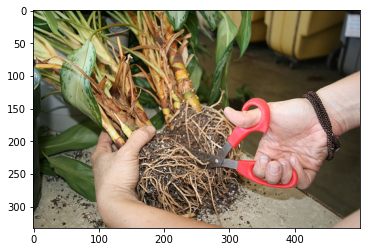

In [20]:
img = cv2.imread(f"{result_list[4]}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#cv2.imwrite(f'{image_id}.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

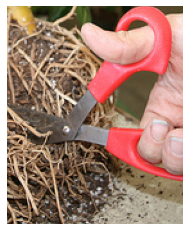

In [37]:
fig, ax = plt.subplots()
ax.imshow(img)
#plt.xlim(x_koor, x_koor+width)
#plt.ylim(y_koor, y_koor+height)
plt.ylim(y_koor+width,y_koor)
plt.xlim(x_koor,x_koor+height)
#plt.grid(False)
plt.axis('off')
#plt.savefig(f'{image_id}_masked2.jpg',bbox_inches = "tight",pad_inches=0)
plt.show()

##### Pillow Matplotlib

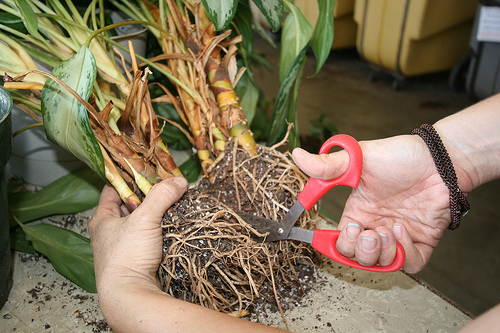

In [60]:
img = Image.open(f"{result_list[4]}") # 2383389.jpg, 2390994.jpg
img

In [61]:
img_width, img_height = img.size

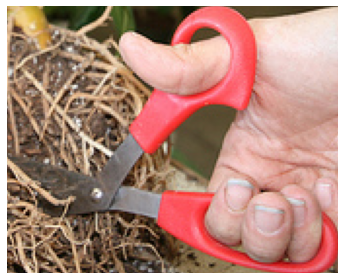

In [63]:
fig, ax = plt.subplots()
ax.imshow(img)
plt.rcParams["figure.autolayout"] = True
plt.ylim(y_koor+height,y_koor)
plt.xlim(x_koor,x_koor+width)
plt.grid(False)
plt.axis('off')
#plt.savefig(f'{image_id}_masked.jpg',bbox_inches = "tight",pad_inches=0)
plt.show()

##### Open CV And Open CV

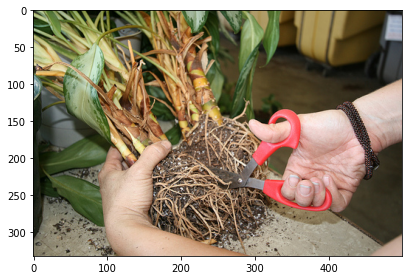

In [64]:
image = cv2.imread(f"{result_list[4]}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept

In [65]:
image.shape[:2]

(333, 500)

In [68]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (x_koor, y_koor), (x_koor+width, y_koor+height), 255, -1)
#cv2.imshow("Rectangular Mask", mask)
# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)

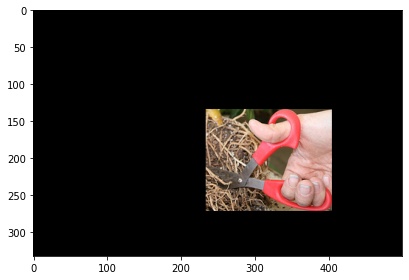

In [69]:
plt.imshow(masked)

In [48]:
cv2.imwrite(f'{image_id}_masked.jpg', cv2.cvtColor(masked, cv2.COLOR_RGB2BGR))

True

#### Image Blurring

##### Open CV

In [70]:
img = cv2.imread(f"{result_list[4]}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

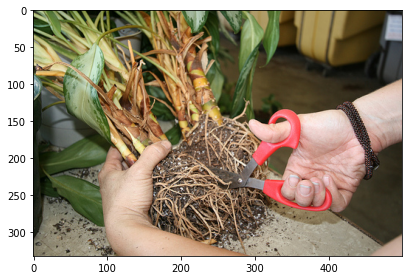

In [71]:
plt.imshow(img)

In [72]:
#avging = cv2.blur(img,(10,10))
blurred_img = cv2.GaussianBlur(img, (21, 21), 0)

In [73]:
mask = np.zeros(img.shape[:2], dtype="uint8")
mask = cv2.rectangle(mask, (x_koor, y_koor), (x_koor+width, y_koor+height), 255, -1)

In [74]:
out = np.where(mask==np.array([255, 255, 255]), img, blurred_img)

<ipython-input-74-b74da2cb5628>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  out = np.where(mask==np.array([255, 255, 255]), img, blurred_img)


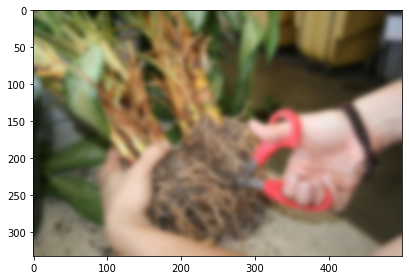

In [75]:
plt.imshow(out)

##### Pillow

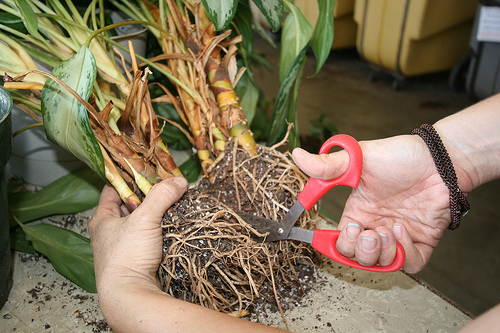

In [21]:
img = Image.open(f"{result_list[4]}") # 2383389.jpg, 2390994.jpg
img

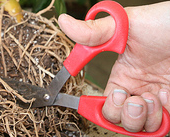

In [78]:
cropped_image = img.crop((x_koor, y_koor, x_koor+width, y_koor+height))
cropped_image

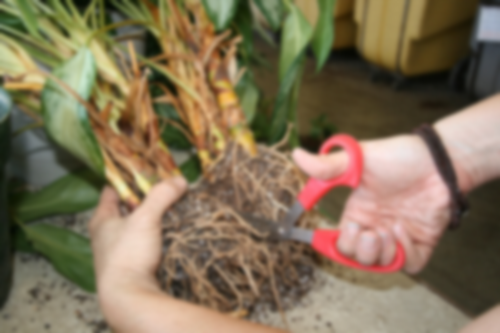

In [79]:
blurred_img = img.filter(ImageFilter.GaussianBlur(radius=2))
blurred_img

In [81]:
blurred_img.paste(cropped_image, (x_koor, y_koor, x_koor+width, y_koor+height))

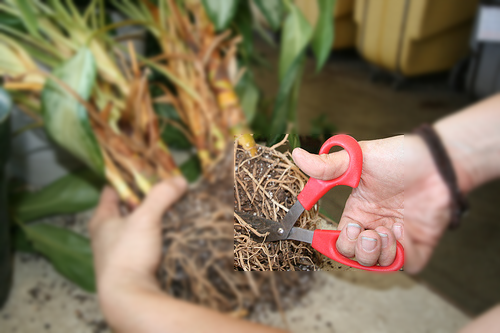

In [82]:
blurred_img

In [64]:
blurred_img.save(f"{image_id}_blurring.jpg")

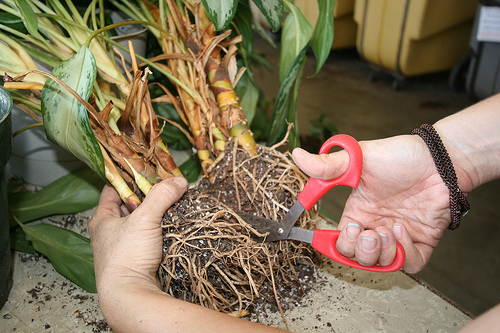

In [84]:
img2 = Image.open(f"{result_list[4]}") # 2383389.jpg, 2390994.jpg
img2

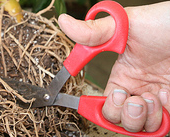

In [85]:
cropped_image2 = img2.crop((x_koor, y_koor, x_koor+width, y_koor+height))
cropped_image2

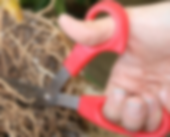

In [86]:
blurred_img2 = cropped_image2.filter(ImageFilter.GaussianBlur(radius=2))
blurred_img2

In [87]:
img2.paste(blurred_img2, (x_koor, y_koor, x_koor+width, y_koor+height))

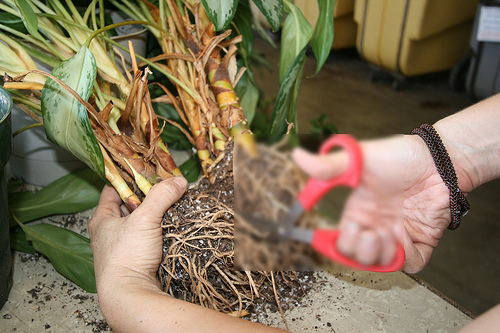

In [88]:
img2

In [22]:
height = result_list[0]
width = result_list[1]
x_koor = result_list[2]
y_koor = result_list[3]

In [23]:
def image_crop_blur(image_file, x_koor, y_koor, height, width, blur_radius=5, blur_part="outside"):
    '''image_crop_blur(image_file, x_koor, y_koor, height, width, blur_radius=5, crop_part="inside")'''
    img = Image.open(f"{image_file}")
    cropped_image = img.crop((x_koor, y_koor, x_koor+width, y_koor+height))
    if blur_part == "outside":
        blurred_img = img.filter(ImageFilter.GaussianBlur(radius=blur_radius))
        blurred_img.paste(cropped_image,(x_koor, y_koor, x_koor+width, y_koor+height))
        return blurred_img
    elif blur_part == "inside":
        blurred_img = cropped_image.filter(ImageFilter.GaussianBlur(radius=blur_radius))
        img.paste(blurred_img,(x_koor, y_koor, x_koor+width, y_koor+height))
        return img
    else:
        return img

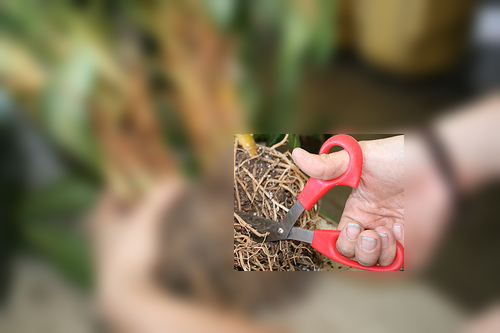

In [24]:
image_crop_blur(result_list[4], x_koor=x_koor, y_koor=y_koor, height=height, width=width, blur_radius=7, blur_part="outside")

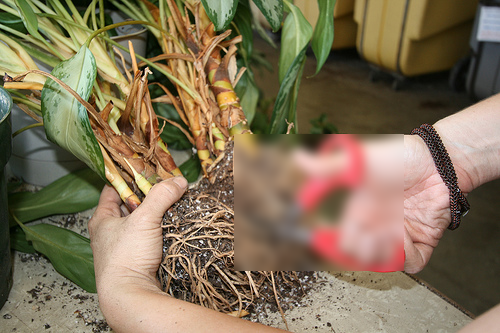

In [ ]:
image_crop_blur(result_list[4], x_koor=x_koor, y_koor=y_koor, height=height, width=width, blur_radius=5, blur_part="inside")

In [ ]:
result_list[4]

'/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K_2/2383389.jpg'

In [ ]:
image_new = image_crop_blur(result_list[4], x_koor=x_koor, y_koor=y_koor, height=height, width=width, blur_part="inside")

In [ ]:
image_new.save(f"{image_id}_blurring3.jpg")

##### Pillow Picture In Picture

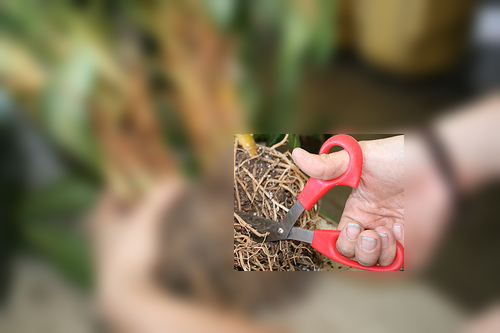

In [110]:
image_new = image_crop_blur(result_list[4], x_koor=x_koor, y_koor=y_koor, height=height, width=width, blur_radius=7, blur_part="outside")
image_new

In [111]:
height_new, width_new = image_new.size

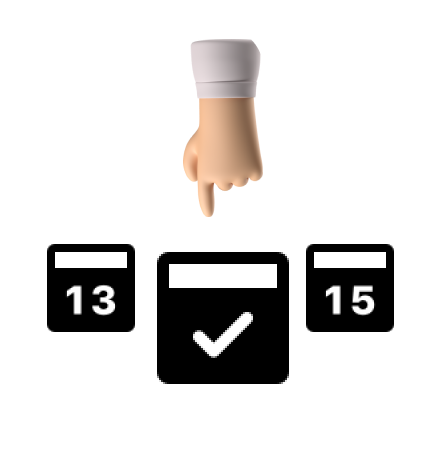

In [112]:
img_add = Image.open(f"PRON present.png")
img_add

In [113]:
height_add, width_add = img_add.size

In [114]:
height_add_edit = int(height_add / 4)
width_add_edit = int(width_add / 4)

In [115]:
newsize = (int(height_add_edit) ,int(width_add_edit))
newsize

(111, 114)

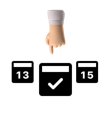

In [116]:
img_add = img_add.resize(newsize)
img_add

In [117]:
#image_new.paste(blurred_img2, (x_koor, y_koor, x_koor+width, y_koor+height))
image_new.paste(img_add, (int(height_new-height_add_edit), 0))

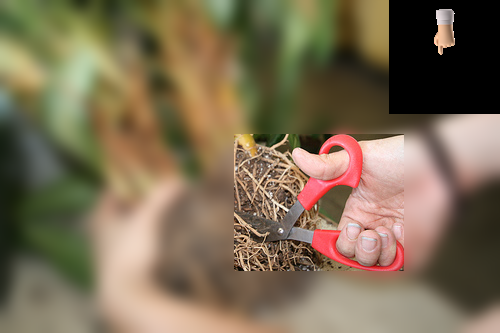

In [118]:
image_new

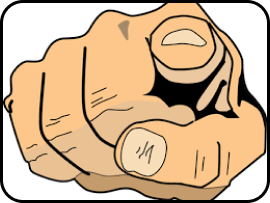

In [119]:
img_add2 = Image.open(f"PRON you your yours yourself.png")
img_add2

In [120]:
height_add2, width_add2 = img_add2.size

In [121]:
height_add_edit2 = int(height_add2 / 2)
width_add_edit2 = int(width_add2 / 2)

In [122]:
newsize2 = (int(height_add_edit2) ,int(width_add_edit2))
newsize2

(135, 101)

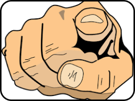

In [123]:
img_add2 = img_add2.resize(newsize2)
img_add2

In [124]:
image_new.paste(img_add2, (0,0))

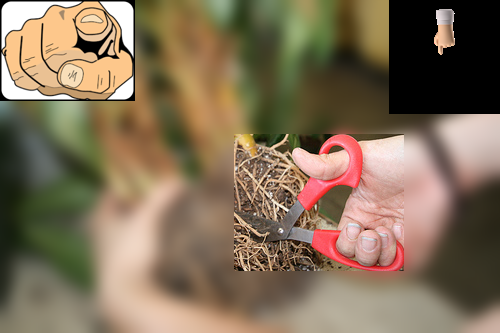

In [125]:
image_new

In [126]:
image_new.save(f"{image_id}_picture_in_picture.jpg")

##### Padding

In [43]:
# read image
img = cv2.imread(f'{image_id}_masked.jpg')
old_image_height, old_image_width, channels = img.shape

# create new image of desired size and color (blue) for padding
#if old_image_height < old_image_width:

aspect_ratio_width = 16
aspect_ratio_height = 9

if old_image_height > old_image_width:
       new_image_width = int((old_image_height/aspect_ratio_height)*aspect_ratio_width)
       new_image_height = int(old_image_height)
elif old_image_height < old_image_width:
       new_image_width = int(old_image_width)
       new_image_height = int((old_image_width/aspect_ratio_width)*aspect_ratio_height)
else:
       new_image_width = old_image_width
       new_image_height = old_image_height
       
#new_image_width = 1600
#new_image_height = 900
color = (0,0,0)
result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

# compute center offset
x_center = (new_image_width - old_image_width) // 2
y_center = (new_image_height - old_image_height) // 2

# copy img image into center of result image
result[y_center:y_center+old_image_height, 
       x_center:x_center+old_image_width] = img

# view result
#cv2.imshow("result", result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# save result
cv2.imwrite(f'{image_id}_masked_padded.jpg', result)

True

#### Copy Move And Delete

In [44]:
output_file = glob.glob(f"")
output_file

[]

In [45]:
for l in output_file:
    source = l # source directory
    destination = path
    shutil.copy2(source, destination)

In [46]:
for j in output_file:
    try:
        os.remove(j)
    except:
        pass